In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

In [3]:
x_train = torch.rand(100)
x_train

tensor([0.1310, 0.6794, 0.1873, 0.2486, 0.7510, 0.8829, 0.8956, 0.3958, 0.4622,
        0.4489, 0.4359, 0.6999, 0.8328, 0.5928, 0.4457, 0.9294, 0.8866, 0.0973,
        0.1581, 0.2966, 0.4226, 0.4285, 0.7049, 0.5696, 0.1369, 0.1386, 0.2881,
        0.1900, 0.1156, 0.4393, 0.4234, 0.3578, 0.3402, 0.2582, 0.2126, 0.0828,
        0.6227, 0.4646, 0.0141, 0.5228, 0.5183, 0.4868, 0.9766, 0.9760, 0.4562,
        0.4982, 0.5694, 0.9224, 0.4021, 0.4564, 0.5723, 0.7356, 0.9028, 0.2332,
        0.0471, 0.0781, 0.3518, 0.3347, 0.2137, 0.4005, 0.0299, 0.3144, 0.4985,
        0.5251, 0.3381, 0.1013, 0.7077, 0.9402, 0.1162, 0.1292, 0.4205, 0.0689,
        0.2687, 0.4142, 0.7543, 0.6285, 0.9551, 0.8777, 0.4782, 0.3763, 0.8166,
        0.1005, 0.8346, 0.0925, 0.3620, 0.0195, 0.8849, 0.6746, 0.8841, 0.6502,
        0.9411, 0.1239, 0.7470, 0.4340, 0.0943, 0.6269, 0.6178, 0.1177, 0.5797,
        0.1095])

In [4]:
x_train = x_train * 20.0 - 10.0
y_train = torch.sin(x_train)

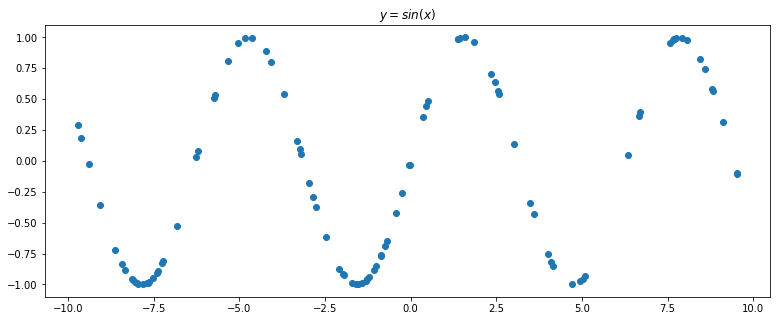

In [5]:
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

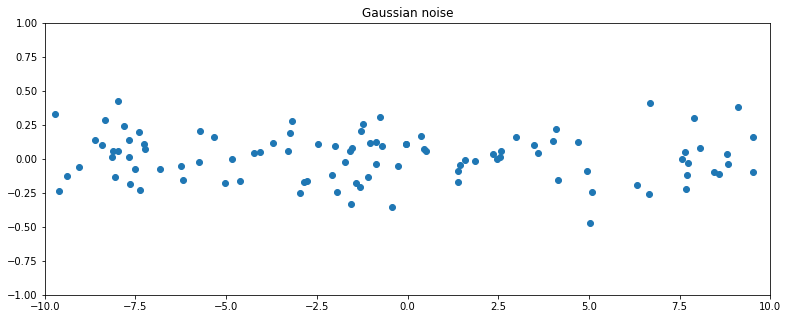

In [6]:
noise = torch.randn(y_train.shape) / 5.
plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

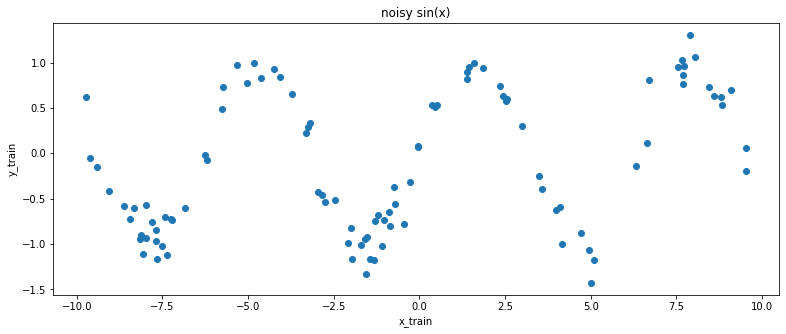

In [7]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

In [8]:
tmp = torch.Tensor([1,2,3])
print(tmp)
print(tmp.unsqueeze(1))

tensor([1., 2., 3.])
tensor([[1.],
        [2.],
        [3.]])


In [9]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [10]:
x_validation = torch.linspace(-10, 10, 100)

In [11]:
x_validation

tensor([-10.0000,  -9.7980,  -9.5960,  -9.3939,  -9.1919,  -8.9899,  -8.7879,
         -8.5859,  -8.3838,  -8.1818,  -7.9798,  -7.7778,  -7.5758,  -7.3737,
         -7.1717,  -6.9697,  -6.7677,  -6.5657,  -6.3636,  -6.1616,  -5.9596,
         -5.7576,  -5.5556,  -5.3535,  -5.1515,  -4.9495,  -4.7475,  -4.5455,
         -4.3434,  -4.1414,  -3.9394,  -3.7374,  -3.5354,  -3.3333,  -3.1313,
         -2.9293,  -2.7273,  -2.5253,  -2.3232,  -2.1212,  -1.9192,  -1.7172,
         -1.5152,  -1.3131,  -1.1111,  -0.9091,  -0.7071,  -0.5051,  -0.3030,
         -0.1010,   0.1010,   0.3030,   0.5051,   0.7071,   0.9091,   1.1111,
          1.3131,   1.5152,   1.7172,   1.9192,   2.1212,   2.3232,   2.5253,
          2.7273,   2.9293,   3.1313,   3.3333,   3.5354,   3.7374,   3.9394,
          4.1414,   4.3434,   4.5455,   4.7475,   4.9495,   5.1515,   5.3535,
          5.5556,   5.7576,   5.9596,   6.1616,   6.3636,   6.5657,   6.7677,
          6.9697,   7.1717,   7.3737,   7.5758,   7.7778,   7.97

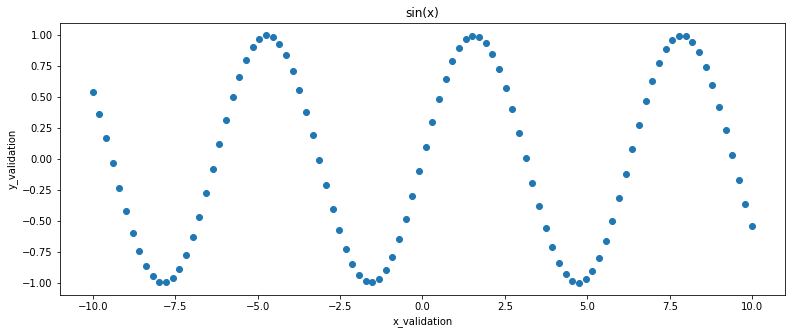

In [12]:
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [13]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

In [14]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(50)

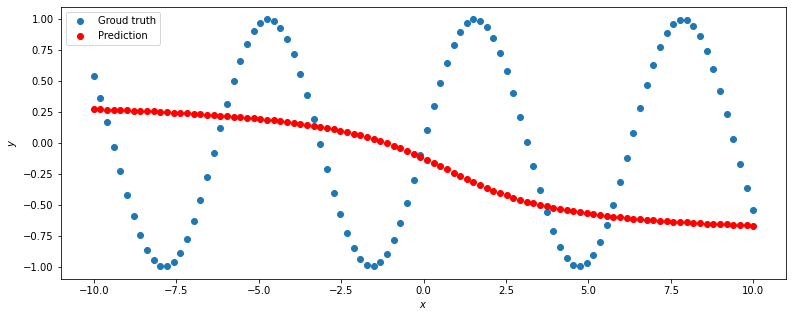

In [15]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

In [16]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

In [17]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

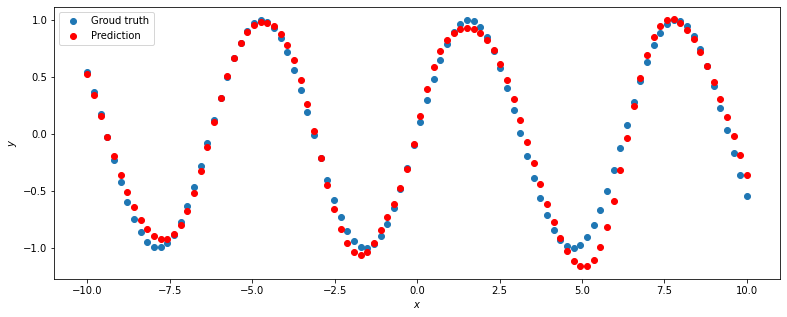

In [18]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)

In [23]:
class RegressionNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(1, 50)
        self.act1 = self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(50, 1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

In [24]:
net = RegressionNet()

In [25]:
def target_function(x):
    return 2**x * torch.sin(2**-x)

In [27]:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [28]:
x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

In [29]:
def metric(pred, target):
    return (pred - target).abs().mean()

In [30]:
def loss(pred, target):
    return metric(pred, target)

In [31]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

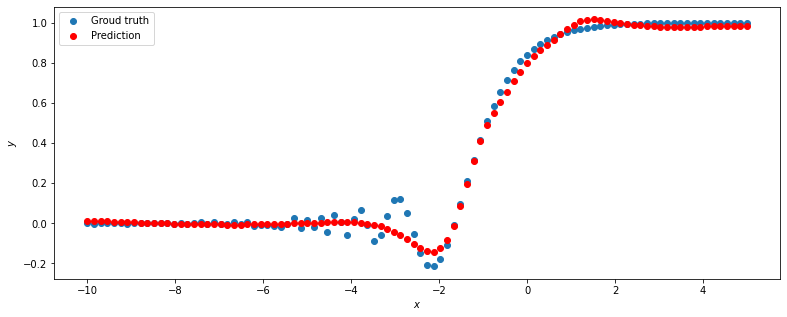

In [35]:
for epoch_index in range(100):
    optimizer.zero_grad()

    y_pred = net.forward(x_train)
    loss_val = loss(y_pred, y_train)
    
    loss_val.backward()
    
    optimizer.step()
    
predict(net, x_validation, y_validation)

In [38]:
print(metric(net.forward(x_validation), y_validation).item())

0.024804458022117615
